In [3]:
import pandas as pd 
import os
import seaborn as sns
raw_data = pd.read_csv('/Users/ethanmeersman/bitcoin.csv')

## Introduction 

    The dataset's I chose were a Historical Bitcoin Dataset from Kaggle.com, and I went through some of the code people made public to shape my analysis.  I also use an ETH dataset from Kraken as well as a XBT (bitcoin price) dataset from the kraken exchange.  Above are the first libraries, and below I load more for the second dataset I used. I loaded these libraries and wrote some beginning code to smooth the data becuase there were a lot of NA's making it harder for data analysis.  Below is how I cleaned the data using methods we discussed in class like dropna(), resetting the index, changing the time stamp to actul data with the datetime built in function and then dropping the one 2011 record.  Below that is a correlation matrix of all the varibles in the study which draw some interesting results especially between Open and Close prices.  Lastly, in the code below I also show a plot of the Bitcoin High and Close fluctuation plot.  This plot did not come out as cleanly as I wanted it to but it shows that there is a fluctuation with how thick the line is there a a decent spread in what it could be.

<ipython-input-17-b2fed9ee9243>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Timestamp'] = pd.to_datetime(newdata['Timestamp'], unit='s')
/Users/ethanmeersman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Bitcoin High and Close Fluctiation Plot')

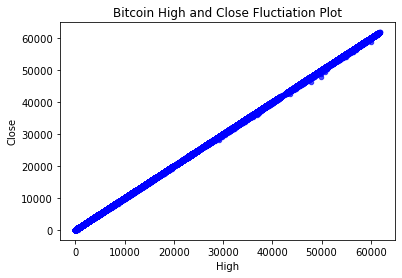

In [17]:
## Drop's the N/A's to clean the data
newdata = raw_data.dropna()
## Resets index so the data columns reset after dropping the N/A's
newdata.reset_index(inplace=True, drop=True)
## Changes Timestamp variable to read it in normal time and not UNIX timestamps.
newdata['Timestamp'] = pd.to_datetime(newdata['Timestamp'], unit='s')
## Top 5 records of cleaned data
newdata.head(5)
## Delete 2011 records so it is from 2012 on
newdata.drop([0,1,2,3], inplace=True)
newdata.reset_index(inplace=True, drop=True)
newdata.head()

## Correlation matrix between all variables after dropping NA's
newdata.corr()

newdata.plot(kind="scatter",x="High",y="Close",alpha=0.7,color="blue")
plt.xlabel("High")
plt.ylabel("Close")
plt.title("Bitcoin High and Close Fluctiation Plot")

In [4]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

btc = pd.read_csv('/Users/ethanmeersman/btckraken/XBTUSD_60.csv', parse_dates=['Timestamp'], date_parser=dateparse,  names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'dunno']) 
eth = pd.read_csv('/Users/ethanmeersman/btckraken/ETHUSD_60.csv', parse_dates=['Timestamp'], date_parser=dateparse,  names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'dunno']) 
storj = pd.read_csv('/Users/ethanmeersman/btckraken/STORJUSD_60.csv', parse_dates=['Timestamp'], date_parser=dateparse,  names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'dunno']) 

# Plotting 

Below is a plot of ETH and Bitcoin in USD since a little before 2014.  As you can obviously see Bitcoin is worth a lot more especially in it's biggest spikes in 2017/2018 and again closer to 2021.  Covid did not effect Bitcoin or ETH prices because of the reddit boom in crypto and also because of DogeCoin which I might also add in a dataset to put all 3 of these currencies because in the last year they have all boomed and dropped and it's interesting to look at the patterns.  On Kaggle I was also able to find a dataset that is all the tweets about Bitcoin and what days they spike and we can also draw conclusions from that as well but that will be later in this notebook.

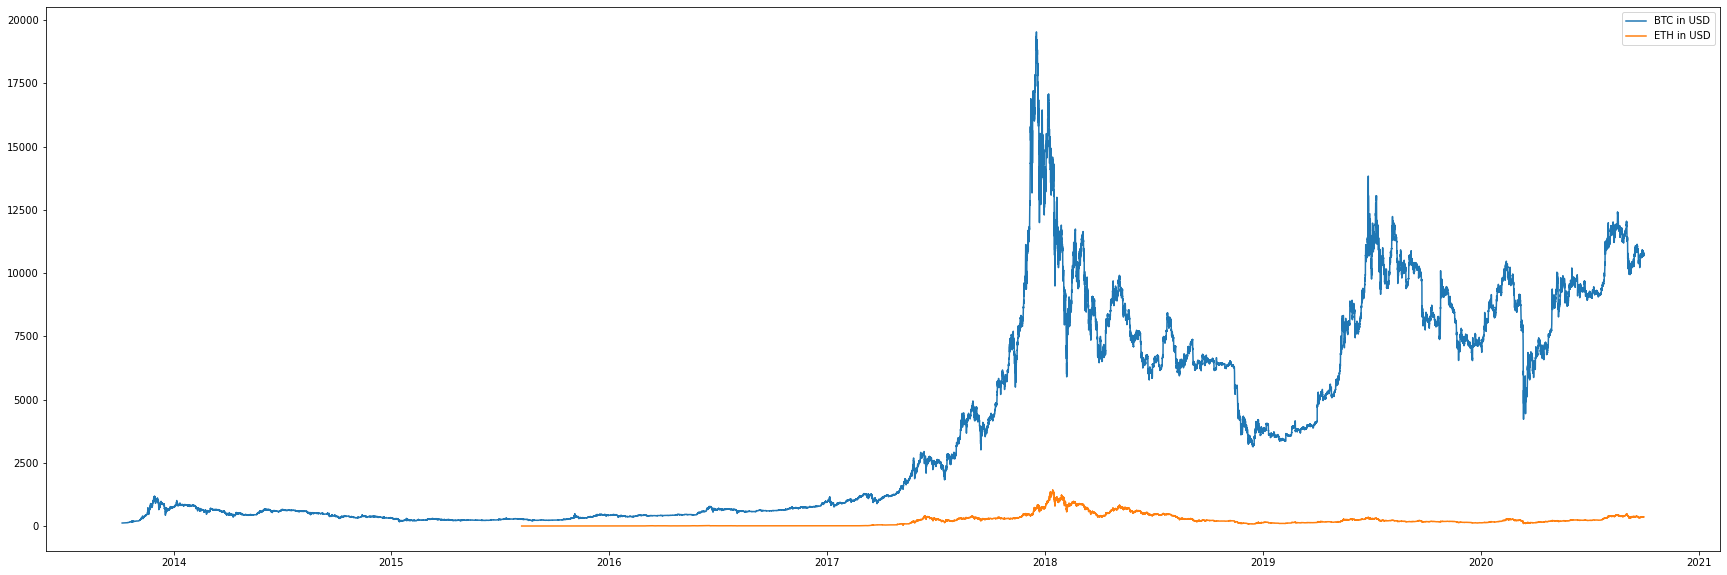

In [12]:
plt.figure(figsize=(30,10))
plt.plot(btc['Timestamp'], btc['Close'], label="BTC in USD")
plt.plot(eth['Timestamp'], eth['Close'], label="ETH in USD")
plt.legend()
plt.show()

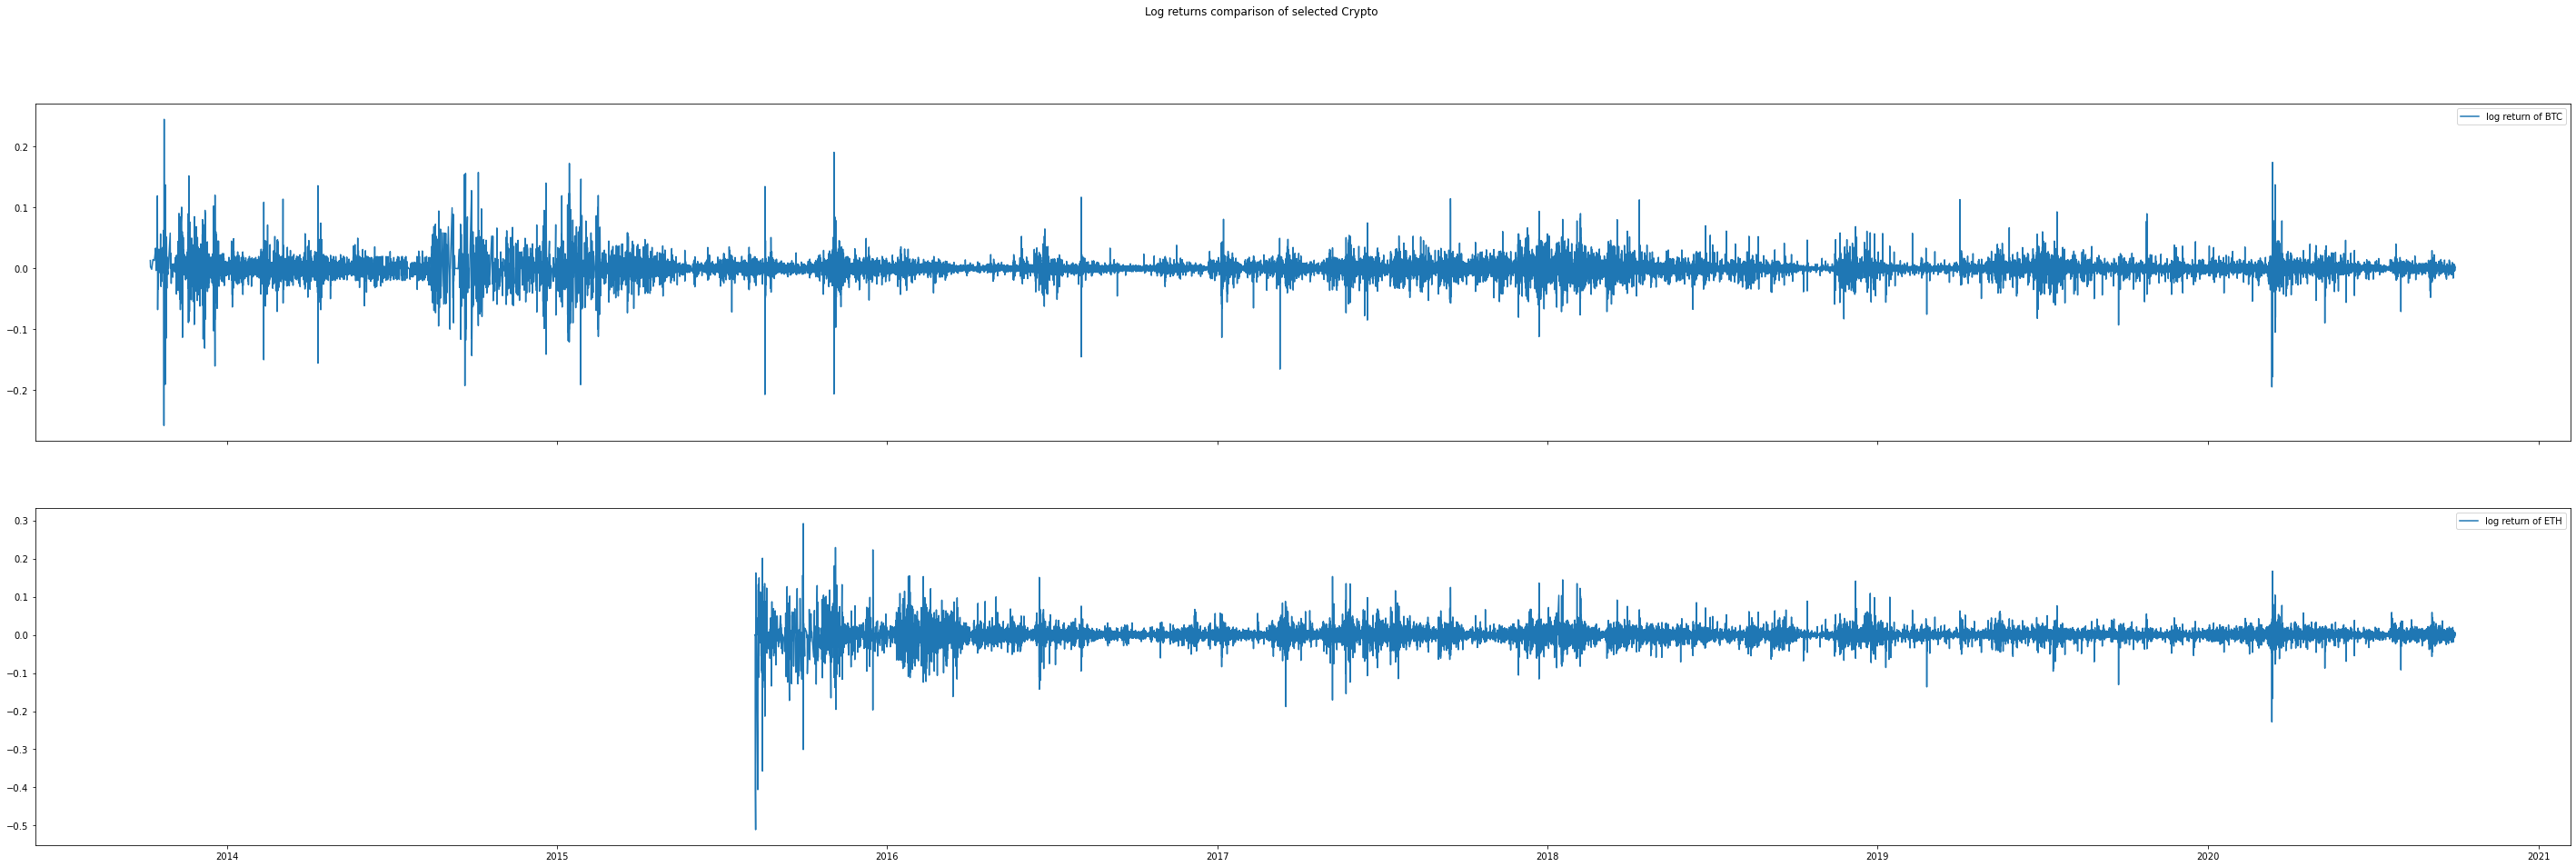

In [15]:
btc['pct_change'] = btc['Open'].pct_change()
btc['log_return'] = np.log1p(btc['Open'].pct_change())

eth['pct_change'] = eth['Open'].pct_change()
eth['log_return'] = np.log1p(eth['Open'].pct_change())

fig, axis = plt.subplots(2, figsize=(50,15), sharex=True)
fig.suptitle('Log returns comparison of selected Crypto')
axis[0].plot(btc['Timestamp'], btc['log_return'], label="log return of BTC", )
axis[0].legend()

axis[1].plot(eth['Timestamp'], eth['log_return'], label="log return of ETH")
axis[1].legend()

In [1]:
from fastquant import get_crypto_data

crypto = get_crypto_data('BTC/USDT', '2019-05-01', '2020-08-02')
crypto.head()

,open,high,low,close,volume
dt,,,,,
2019-05-02,5383.20,5538.0,5370.00,5492.87,22795.787835
2019-05-03,5494.81,5844.0,5477.57,5772.69,46297.172849
2019-05-04,5770.62,5900.0,5587.45,5829.45,39682.408991
2019-05-05,5829.83,5839.9,5696.00,5775.62,23822.543775
2019-05-06,5773.18,5805.0,5619.14,5747.79,25256.596325


Text(0, 0.5, 'USDT')

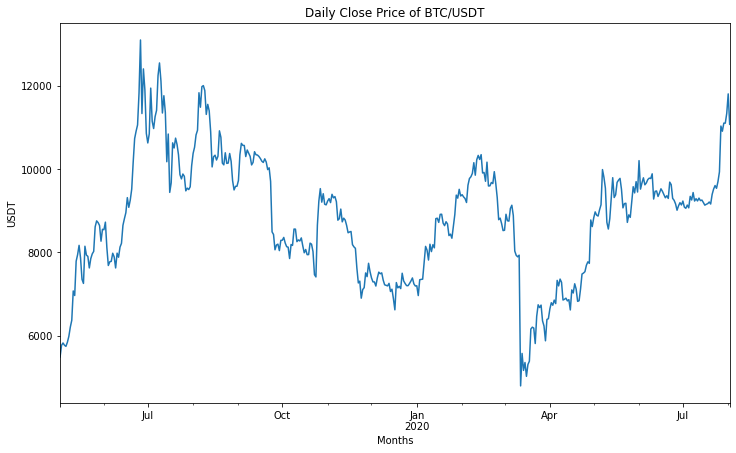

In [6]:
crypto.close.plot(figsize=(12, 7))

## Plot for the last 15 months of the daily closing price of Bitcoin in USDT
plt.title('Daily Close Price of BTC/USDT')
plt.xlabel('Months')
plt.ylabel('USDT')

In [12]:
from pycoingecko import CoinGeckoAPI

coingecko = CoinGeckoAPI()

def get_btcdata(cryptocurrency):
    cryptocurrency_data = coingecko.get_coin_by_id(cryptocurrency, market_data='true', sparkline='true')
    df = pd.DataFrame.from_dict(cryptocurrency_data, orient='index')
    df.to_csv(r'cryptocurrency_data')
    return df

get_btcdata('bitcoin')

get_btcdata('ethereum')

,0
id,ethereum
symbol,eth
name,Ethereum
asset_platform_id,None
platforms,"{'': '', 'binance-smart-chain': '0x2170ed0880a..."
block_time_in_minutes,0
hashing_algorithm,Ethash
categories,[Smart Contract Platform]
public_notice,None
additional_notices,[]


In [13]:
def get_historical_data(cryptocurrency, fiat_currency, number_of_days):
    historic_price = coingecko.get_coin_market_chart_by_id(cryptocurrency, fiat_currency, number_of_days)
    prices = [price[1] for price in historic_price['prices']]
    return prices
 
print(get_historical_data('bitcoin', 'USD', 5))

[31729.79233075018, 31973.68849128743, 32119.049551483193, 32313.670421157323, 32196.9742743501, 32070.840537889653, 31920.42944276937, 32011.082270913834, 32115.619233934656, 31969.425416386686, 32083.4922453297, 32169.651009037287, 32175.18374039387, 31926.572850680794, 31996.302728297385, 31991.08537846151, 32280.779995611963, 32145.31780494659, 32306.460381617533, 32540.290282033486, 32427.368844741766, 32447.46826135144, 32335.728530063483, 32377.696904090142, 32340.659806934273, 32269.562944630678, 32265.141094760842, 32385.972609683973, 32397.302244835373, 32858.57716154344, 32653.661626538717, 32612.744040479407, 32701.45678840927, 32699.67029567918, 32616.407599142938, 32506.70707597479, 32500.10162644437, 32419.943277490966, 32382.708883213723, 32386.95411904472, 32378.345834482367, 32547.576203870376, 32501.344945962464, 32405.85303268821, 32225.570482972267, 32299.70117271833, 32180.828599176322, 32311.139560499058, 32522.102276693717, 32674.785027284615, 33367.693485902804